# Case Study - Jamboree Linear Regression

## About Jamboree

Jamboree has helped thousands of students to make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

## Business Problem

Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

**Dataset Column Profiling:**

- Serial No. (Unique row ID)
- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose and Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience (either 0 or 1)
- Chance of Admit (ranging from 0 to 1)

**Concept Used:**

- Exploratory Data Analysis
- Linear Regression

## Additional views

In this case study, we will focus on using linear regression to build a model which can predict chances of admission for a given candidate. We will test and attempt to ensure that all linear regression assumptions are satisfied. We will use Ordinary least square APIs from statsmodel library for building/validating the model. 

## Solution

### Import common libraries and read data

In [1]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
import seaborn as sns
#from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function

data = pd.read_csv('data/Jamboree_Admission.csv')

#create a copy of the original data for updates as necessary
df = data.copy()

df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [2]:
df.shape

(500, 9)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [5]:
# Remove leading/trailing spaces from the column names
df.columns = df.columns.str.strip() 

#check possible values of ordinal variables
for col in ['University Rating', 'SOP', 'LOR']:
    print(df[col].value_counts())

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64
4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64
3.0    99
4.0    94
3.5    86
4.5    63
2.5    50
5.0    50
2.0    46
1.5    11
1.0     1
Name: LOR, dtype: int64


**Observations**

1. The dataset has 500 rows and 9 columns. The dataset **does not have any missing (null) values.**

2. 'Chance of Admit' is the target (dependent) column with probability value ranging from 0.34 to 0.97. The mean and median probability values are ~0.72. 

3. 'Serial No' is an identifier column and will be removed from the further analysis. 

4. There is a significant difference in the scale of different independent features. 'GRE Score' and 'TOEFL Score' values have relatively higher range - [290, 340] and [92, 120] respectively - while variables such as 'University Rating', 'SOP', 'LOR' have values in lower range - [1, 5]. In the following sections, we will use feature scaling to address this.

5. 'GRE score', 'TOEFL Score', and 'CGPA' can be treated as continuous variables and thus are suitable for linear regression analysis after feature scaling.

6. 'University Rating', 'SOP', and 'LOR' seem ordinal categorical in nature and hence suitable for linear regression analysis. 

7. 'Research' is a dichotomous variable with numeric value {0,1} and hence suitable for the linear regression.

### Remove Serial No column

In [6]:
#helper function
def dropcol(df, cols, inplace=False):
    if type(cols) is str:
        cols = [cols]
    for col in cols:    
        if(col in df.columns):
            df.drop(labels=col, axis=1, inplace=inplace)
    return df

# Remove Serial No column
dropcol(df, 'Serial No.', inplace=True)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


### Univariate Analysis

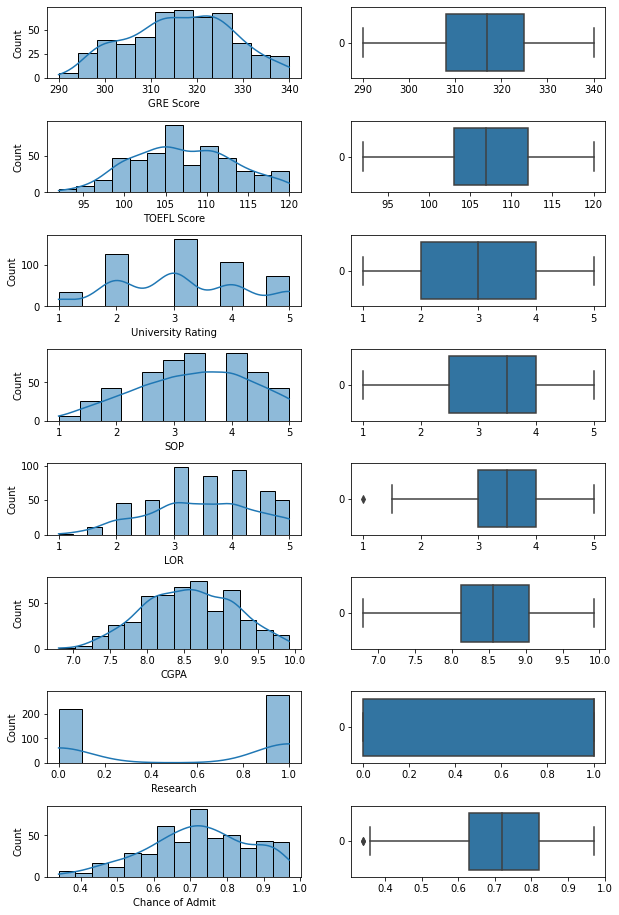

In [8]:
cols = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit']

fig, ax = plt.subplots(len(cols), 2, figsize=(10, 16))
for i in range(len(cols)):
    col = cols[i]
    sns.histplot(data=df[col], kde=True, ax=ax[i][0])
    sns.boxplot(data=df[col], orient="horizontal", ax=ax[i][1])    
plt.subplots_adjust(hspace=0.6)    
plt.show()

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


**Observations**

1. The distributions of 'GRE Score' and 'TOEFL Score' look fairly symmetrical with their mean and median coinciding (at 317 and 107 respectively).

2. The distribution of 'university rating' look relatively symmetrical as well with its mean at 3.1 and median at 3. 

3. 'CGPA' distribution appear symmetrical as well with its mean and median coinciding at 8.56.

4. 'SOP' and 'LOR' appear somewhat left skewed. Similarly, 'Chance of Admit' is left skewed as well.

5. There is one outlier having LOR value 1. Similarly, there is one outlier in 'Chance of Admit' variable. We will check them further in the section on outliers analysis. 

### Bivariate analysis

#### Pair plot and correlation 

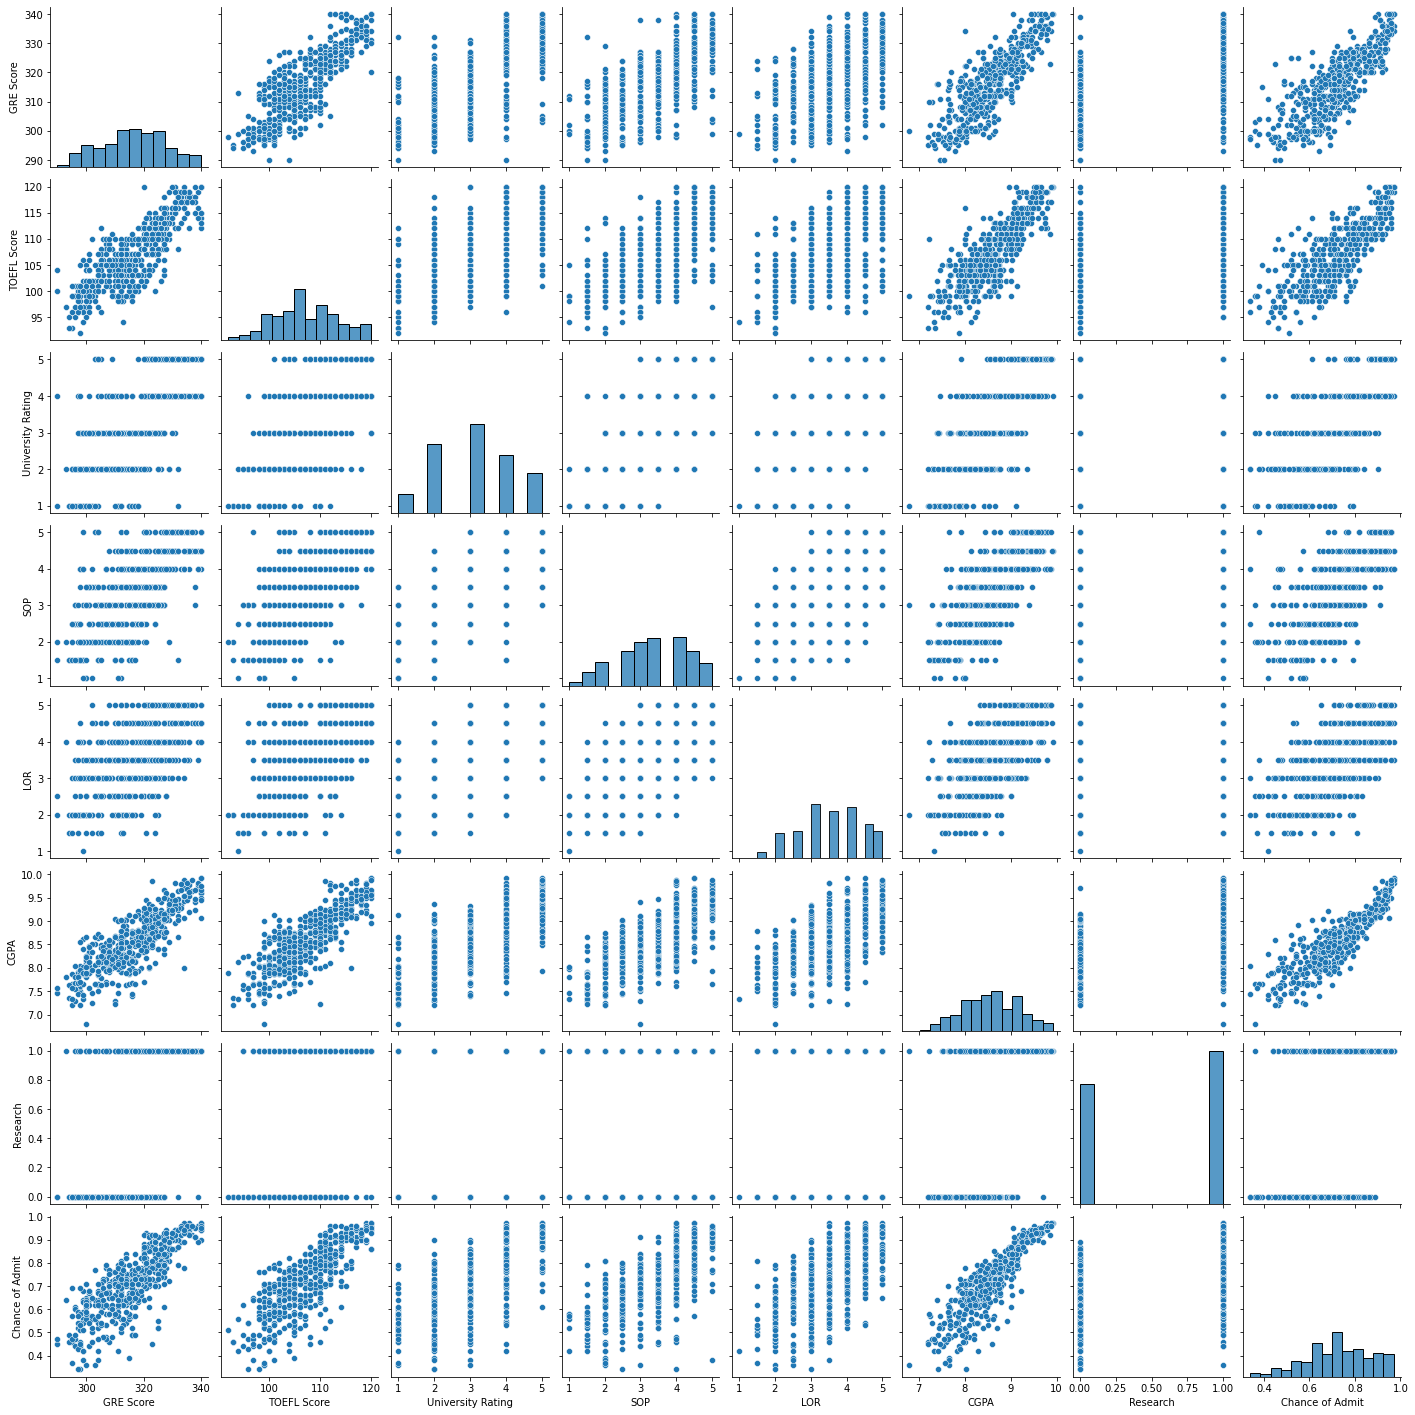

In [10]:
# pair plots
sns.pairplot(df)
#sns.pairplot(df, x_vars = ['GRE Score', 'TOEFL Score', 'CGPA'], y_vars=['Chance of Admit'])
#sns.pairplot(df, x_vars = ['University Rating', 'SOP', 'LOR', 'Research'], y_vars=['Chance of Admit'])
plt.show()

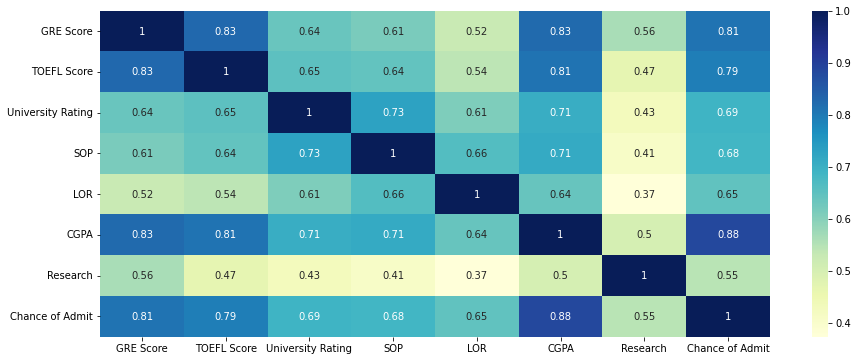

In [11]:
#correlation matrix
corr_df = df.corr(method='pearson')

plt.figure(figsize=(15,6))
sns.heatmap(corr_df, cmap="YlGnBu", annot=True)
plt.show()

**Observations**

1. There is a strong correlation among GRE Score, TOEFL Score, and CGPA values (>0.8). Similarly, there is high correlation among other independent features such as SOP, LOR, University Ranking, and the three scores variables. Also, from the scatter plot, we can observe that GRE, TOEFL scores and CGPA have strong linear relationship. Similarly, there seems some linear relationship among other independent features such as LOR, SOP, University Rating, and the three scores. Thus our dataset seem to have high multicollinearity which is not desirable for linear regression. In the subsequent sections, we will attempt to address this by computing VIF score, and combining, removing features to remove multicollinearity.

2. Chance of Admit dependent variable seem to have linear relationship with all the other independent variables. This is desirable. CGPA, GRE, and TOEFL scores seem to have strong correlation with chance of admit. Similarly, SOP, LOR, and University rating also have high positive correlation with chance of admit. 

3. Research variable has moderate correlation with chance of admit. Similiarly, it has moderate to weak correlation with other independent features.  

### Data preprocessing

#### Outliers detection and treatment

Linear regression is sensitive to outliers. Therefore, it's desirable to treat outliers before building the model.

In [12]:
#helper function to find outliers
def findoutliers(arr):        
    q3 = np.percentile(arr, 75)
    q1 = np.percentile(arr, 25)    
    iqr = q3-q1
    ulim = q3 + 1.5*iqr
    llim = q1 - 1.5*iqr
    return pd.Series([True if((ele > ulim) or (ele < llim)) else False for ele in arr])

n = df.shape[0]
outliers = []
outlier_rows = pd.Series([False]*n) 

for col in df.columns:
    ret = findoutliers(df[col])
    outlier_rows = outlier_rows | ret
    outliers_n = ret.sum()
    outliers.append([col, outliers_n, np.round((outliers_n / n) * 100, 2)])
    
print(pd.DataFrame(outliers, columns=['column', 'outlier count', 'outlier %']))
print(f'\nTotal outlier records = {np.sum(outlier_rows)}')
print(f'Total outlier record percentage = {(np.sum(outlier_rows)/n)*100}%')

              column  outlier count  outlier %
0          GRE Score              0        0.0
1        TOEFL Score              0        0.0
2  University Rating              0        0.0
3                SOP              0        0.0
4                LOR              1        0.2
5               CGPA              0        0.0
6           Research              0        0.0
7    Chance of Admit              2        0.4

Total outlier records = 3
Total outlier record percentage = 0.6%


**Since the count of outlier rows is very small, we can remove them.**

In [13]:
df = df[~outlier_rows]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          497 non-null    int64  
 1   TOEFL Score        497 non-null    int64  
 2   University Rating  497 non-null    int64  
 3   SOP                497 non-null    float64
 4   LOR                497 non-null    float64
 5   CGPA               497 non-null    float64
 6   Research           497 non-null    int64  
 7   Chance of Admit    497 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 34.9 KB


### Creating training and test sets

The given data-set has 500 rows. We divide this data-set into two sets-training (70%) and test(30%). We use training set to train models, and use test set to validate model accuracy measures. 

**NOTE** - It is more desirable to split the given data-set into *training*, *validation*, and *test* data-sets, and use training/validation for feature selection,model building, and parameter tuning, and finally use unseen test dataset to test model performance. However, since the given dataset has only 500 rows, we split it into just training and test datasets. 

In [14]:
X = df[df.columns.drop('Chance of Admit')]
y = df["Chance of Admit"] 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)

In [15]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

print(X_train.shape)
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)

(347, 7)
(150, 7)
(347, 7)
(150,)


### Feature Scaling

As observed in the univariate analysis section, different features have different scales. The standard linear regression may not necessarily require sstandardization/normalization, however, while using penalization methods like Lasso and Ridge regression, it's usually advisable to scale the features. We will use minmax normalization for this case study.

In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#helper function to normalize features
def normalize_features(df, scaler=None):
    if(scaler is None):
        scaler = MinMaxScaler()    
        scaler.fit(df)
        
    scaled_values = scaler.transform(df)  # this returns numpy.ndarray not df.
    df = pd.DataFrame(scaled_values, columns=df.columns)
    
    return df, scaler

X_train, scaler = normalize_features(X_train)
X_test, scaler = normalize_features(X_test, scaler)

In [17]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,347.0,0.521614,0.222814,0.0,0.360000,0.520000,0.680000,1.0
TOEFL Score,347.0,0.523642,0.222858,0.0,0.370370,0.518519,0.666667,1.0
University Rating,347.0,0.520173,0.282479,0.0,0.250000,0.500000,0.750000,1.0
SOP,347.0,0.590058,0.242284,0.0,0.375000,0.625000,0.750000,1.0
LOR,347.0,0.562371,0.261867,0.0,0.428571,0.571429,0.714286,1.0
CGPA,347.0,0.570957,0.189316,0.0,0.427653,0.559486,0.720257,1.0
Research,347.0,0.536023,0.499421,0.0,0.000000,1.000000,1.000000,1.0


### Feature Selection

In this section, we implement a few helper APIs to simply the use of Statsmodel OLS APIs. We then build several versions of linear models-each with different set of independent features-starting with one feature and gradually adding more features. For each model, we keep track of VIF values (to ensure low multicollineairy), and the accuracy scores (esp adjusted Rsquared) against both training and test data-sets. We finally select the model which provides sufficient accuracy without suffering from multicollinearity. 

In [18]:
import statsmodels.api as sm

#helper function to create SM OLS model
#reference: https://www.statsmodels.org/dev/examples/notebooks/generated/predict.html

class OLSHelper:
    
    def createModel(self,X_df, y_ser):
        X_df_sm = sm.add_constant(X_df)  #Statmodels default is without intercept, to add intercept we need to add constant 
        self.olsmod = sm.OLS(y_ser.values.reshape(-1,1), X_df_sm)
        
        self.olsres = self.olsmod.fit()
        self.olsres_l = self.olsmod.fit_regularized(method='elastic_net', alpha=0.01, L1_wt=1.0) #lasso
        self.olsres_r = self.olsmod.fit_regularized(method='elastic_net', alpha=0.01, L1_wt=0.0) #Ridge
        
        self.dim = X_df_sm.shape[1]
        return self.olsmod, self.olsres, self.olsres_l, self.olsres_r
    
    def predict(self, X_df):
        if(X_df.shape[1] != self.dim):
            X_df = sm.add_constant(X_df)            
        return self.olsres.predict(X_df), self.olsres_l.predict(X_df), self.olsres_r.predict(X_df)
    
    def rsquared(self, y, y_hat):
        y_mean = np.mean(y)
        SSr = np.sum((y - y_hat)**2)        
        SSt = np.sum((y - y_mean)**2)        
        return 1 - SSr/SSt
        
    def rsquared_adj(self, X, y, y_hat):
        rsq = self.rsquared(y, y_hat)
        n = X.shape[0]
        k = X.shape[1]
        return 1 - ((1 - rsq) * (n-1)/(n-k-1))
    
    def mse(self, y, y_hat):
        return np.mean((y - y_hat)**2) 
    
    def rmse(self, y, y_hat):
        return self.mse(y, y_hat)**0.5
    
    def mae(self, y, y_hat):
        return np.mean(abs(y - y_hat))
    
    def mape(self, y, y_hat):
        return np.mean(abs((y - y_hat) / y))    
    
    def evalmodel(self, X_train, y_train, y_hat_train_map, X_test, y_test, y_hat_test_map):
        res = []
        regularization = ['None', 'Lasso', 'Ridge']
        
        #add training eval param
        for reg in regularization:        
            y_hat = y_hat_train_map[reg]
            res.append((
                'training',
                reg,
                self.rsquared(y_train, y_hat),
                self.rsquared_adj(X_train, y_train, y_hat),
                self.rmse(y_train, y_hat),
                self.mae(y_train, y_hat),
                self.mape(y_train, y_hat),
            ))
        
        #add test eval param if available
        if(X_test is not None):
            
            for reg in regularization:        
                y_hat = y_hat_test_map[reg]
                res.append((
                    'test',
                    reg,
                    self.rsquared(y_test, y_hat),
                    self.rsquared_adj(X_test, y_test, y_hat),
                    self.rmse(y_test, y_hat),
                    self.mae(y_test, y_hat),
                    self.mape(y_test, y_hat),
                ))
        
        return pd.DataFrame(res, columns=['dataset', 'regularization', 'rsquared', 'rsquared_adj', 'RMSE', 'MAE', 'MAPE'])

#Helper function to build and show OLS model
def displayOLSModel(X_train, y_train, X_test, y_test, showsummary=True):        
    ols_helper = OLSHelper()    
    model, olsres, olsres_l, olsres_r = ols_helper.createModel(X_train, y_train)

    #print OLS model summary
    if(showsummary):
        print(olsres.summary())

    #predict
    y_hat_train, y_hat_l_train, y_hat_r_train = ols_helper.predict(X_train)
    y_hat_test, y_hat_l_test, y_hat_r_test = ols_helper.predict(X_test)

    y_hat_train_map = {
        'None': y_hat_train, 'Lasso': y_hat_l_train, 'Ridge': y_hat_r_train
    }
    y_hat_test_map = {
        'None': y_hat_test, 'Lasso': y_hat_l_test, 'Ridge': y_hat_r_test
    }
    return ols_helper.evalmodel(X_train, y_train, y_hat_train_map , X_test, y_test, y_hat_test_map)
    
displayOLSModel(X_train, y_train, X_test, y_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     212.8
Date:                Sat, 05 Nov 2022   Prob (F-statistic):          6.12e-120
Time:                        22:00:13   Log-Likelihood:                 485.34
No. Observations:                 347   AIC:                            -954.7
Df Residuals:                     339   BIC:                            -923.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3537      0.01

,dataset,regularization,rsquared,rsquared_adj,RMSE,MAE,MAPE
0,training,None,0.814599,0.810770,0.059749,0.042657,0.068240
1,training,Lasso,0.682121,0.675557,0.078235,0.062245,0.096223
2,training,Ridge,0.799926,0.795795,0.062068,0.045654,0.072983
3,test,None,0.826055,0.817480,0.057431,0.043511,0.067564
4,test,Lasso,0.747048,0.734579,0.069256,0.054389,0.082006
5,test,Ridge,0.835646,0.827545,0.055825,0.041758,0.064672


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#helper function to show VIF for all columns
def showVif(X_df):
    vif = pd.DataFrame()
    vif['Features'] = X_df.columns
    vif['VIF'] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [20]:
showVif(X_train)

,Features,VIF
5,CGPA,37.05
0,GRE Score,31.40
1,TOEFL Score,27.04
3,SOP,18.14
4,LOR,10.98
2,University Rating,10.57
6,Research,3.13


**We observe high VIF for CGPA, GRE Score, TOEFL Score, as well as other features except for Research.**

One way is to remove the features with high VIF values. However, since CGPA, GRE, and TOEFL scores can be important in determining admission (based on our natural intuition), we cannot remove them. Instead, we can combine them into a single score variable named 'academic_score' 

**Combine GRE, TOEFL, and CGPA into a single academic_score variable**

In [43]:
def combine_exam_scores(df):
    if('academic_score' not in df.columns):
        df['academic_score'] = (df['GRE Score'] + df['TOEFL Score'] + df['CGPA'])/3
    
    return df

combine_exam_scores(X_train)
combine_exam_scores(X_test)

dropcol(X_train, ['GRE Score', 'TOEFL Score', 'CGPA'], inplace=True)
dropcol(X_test, ['GRE Score', 'TOEFL Score', 'CGPA'], inplace=True)

X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
University Rating,347.0,0.520173,0.282479,0.000000,0.250000,0.500000,0.750000,1.0
SOP,347.0,0.590058,0.242284,0.000000,0.375000,0.625000,0.750000,1.0
LOR,347.0,0.562371,0.261867,0.000000,0.428571,0.571429,0.714286,1.0
Research,347.0,0.536023,0.499421,0.000000,0.000000,1.000000,1.000000,1.0
academic_score,347.0,0.538738,0.199153,0.086688,0.402189,0.517062,0.686315,1.0


In [22]:
#run VIF again
print(showVif(X_train))

#check OLS model
displayOLSModel(X_train, y_train, X_test, y_test)

            Features    VIF
1                SOP  17.74
4     academic_score  16.81
0  University Rating  10.48
2                LOR  10.23
3           Research   2.95
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     246.3
Date:                Sat, 05 Nov 2022   Prob (F-statistic):          7.56e-111
Time:                        22:00:14   Log-Likelihood:                 458.17
No. Observations:                 347   AIC:                            -904.3
Df Residuals:                     341   BIC:                            -881.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err   

,dataset,regularization,rsquared,rsquared_adj,RMSE,MAE,MAPE
0,training,None,0.783171,0.779992,0.064615,0.047390,0.075968
1,training,Lasso,0.509576,0.502385,0.097176,0.076993,0.118270
2,training,Ridge,0.765956,0.762524,0.067131,0.050295,0.080431
3,test,None,0.842431,0.836959,0.054661,0.040473,0.062895
4,test,Lasso,0.559065,0.543754,0.091438,0.071836,0.107787
5,test,Ridge,0.818542,0.812242,0.058658,0.043374,0.066987


**We still observe high VIF for all features except Research. We can try removing SOP column and try again.**

In [24]:
_X_train = X_train.copy()
_X_test = X_test.copy()

dropcol(_X_train, ['SOP'], inplace=True)
dropcol(_X_test, ['SOP'], inplace=True)

print(showVif(_X_train))
displayOLSModel(_X_train, y_train, _X_test, y_test)

            Features    VIF
3     academic_score  13.43
0  University Rating   9.32
1                LOR   8.65
2           Research   2.95
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     305.5
Date:                Sat, 05 Nov 2022   Prob (F-statistic):          1.69e-111
Time:                        22:00:14   Log-Likelihood:                 456.72
No. Observations:                 347   AIC:                            -903.4
Df Residuals:                     342   BIC:                            -884.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.

,dataset,regularization,rsquared,rsquared_adj,RMSE,MAE,MAPE
0,training,None,0.781348,0.778791,0.064886,0.047567,0.076059
1,training,Lasso,0.509576,0.503840,0.097176,0.076993,0.118270
2,training,Ridge,0.765741,0.763001,0.067161,0.050405,0.080379
3,test,None,0.843557,0.839241,0.054465,0.039993,0.062163
4,test,Lasso,0.559065,0.546901,0.091438,0.071836,0.107787
5,test,Ridge,0.824864,0.820032,0.057627,0.042851,0.066009


**We still have high VIF for all features except Research. Next, we try building several versions of linear models starting with one feature and adding more features till all VIFs < 5 and accurarcy is sufficient.**

In [44]:
_X_train = X_train.copy()
_X_test = X_test.copy()

#print(showVif(_X_train))
selected_cols = ['academic_score']
displayOLSModel(_X_train[selected_cols], y_train, _X_test[selected_cols], y_test, False)

            Features    VIF
1                SOP  17.74
4     academic_score  16.81
0  University Rating  10.48
2                LOR  10.23
3           Research   2.95


,dataset,regularization,rsquared,rsquared_adj,RMSE,MAE,MAPE
0,training,None,0.749297,0.748571,0.069479,0.050731,0.080182
1,training,Lasso,0.715831,0.715008,0.073971,0.058315,0.089206
2,training,Ridge,0.736726,0.735963,0.071199,0.054007,0.084239
3,test,None,0.819753,0.818535,0.058462,0.044852,0.068776
4,test,Lasso,0.769460,0.767902,0.066117,0.054334,0.080753
5,test,Ridge,0.798977,0.797619,0.061740,0.048924,0.074103


**Observation** - Using just 'academic_score' as the lone variable, we get adj Rsquare of 74% and ~82% for training and test data. We will add more features to see if the accuracy can be improved without introducing multicollinearity.

In [28]:
selected_cols = ['academic_score', 'Research']
print(showVif(_X_train[selected_cols]))
displayOLSModel(_X_train[selected_cols], y_train, _X_test[selected_cols], y_test, False)

         Features   VIF
0  academic_score  2.93
1        Research  2.93


,dataset,regularization,rsquared,rsquared_adj,RMSE,MAE,MAPE
0,training,None,0.759020,0.757619,0.068118,0.049957,0.079227
1,training,Lasso,0.724739,0.723138,0.072802,0.057284,0.088022
2,training,Ridge,0.744135,0.742648,0.070190,0.053054,0.083280
3,test,None,0.817840,0.815362,0.058772,0.043984,0.067890
4,test,Lasso,0.767716,0.764556,0.066367,0.052884,0.079172
5,test,Ridge,0.789925,0.787067,0.063114,0.048201,0.073664


**Observation**: after adding Research, Rsquare has increased slightly. VIF values are < 5. This can be a potentially good candidate model.

In [29]:
selected_cols = ['academic_score', 'LOR']
print(showVif(_X_train[selected_cols]))
displayOLSModel(_X_train[selected_cols], y_train, _X_test[selected_cols], y_test, False)

         Features   VIF
0  academic_score  7.91
1             LOR  7.91


,dataset,regularization,rsquared,rsquared_adj,RMSE,MAE,MAPE
0,training,None,0.770971,0.769640,0.066408,0.048617,0.076865
1,training,Lasso,0.715831,0.714179,0.073971,0.058315,0.089206
2,training,Ridge,0.757017,0.755604,0.068401,0.051186,0.080167
3,test,None,0.842585,0.840444,0.054634,0.040838,0.062772
4,test,Lasso,0.769460,0.766323,0.066117,0.054334,0.080753
5,test,Ridge,0.827559,0.825213,0.057182,0.042952,0.065191


**observation** : High VIF. Not desirable.

In [30]:
selected_cols = ['academic_score', 'SOP']
print(showVif(_X_train[selected_cols]))
displayOLSModel(_X_train[selected_cols], y_train, _X_test[selected_cols], y_test, False)

         Features    VIF
0  academic_score  12.36
1             SOP  12.36


,dataset,regularization,rsquared,rsquared_adj,RMSE,MAE,MAPE
0,training,None,0.763654,0.762280,0.067460,0.049342,0.078692
1,training,Lasso,0.715831,0.714179,0.073971,0.058315,0.089206
2,training,Ridge,0.748723,0.747262,0.069558,0.052607,0.083037
3,test,None,0.825847,0.823477,0.057465,0.043779,0.067481
4,test,Lasso,0.769460,0.766323,0.066117,0.054334,0.080753
5,test,Ridge,0.798950,0.796214,0.061744,0.047347,0.072435


**observation** : High VIF. Not desirable.

In [31]:
selected_cols = ['academic_score', 'University Rating']
print(showVif(_X_train[selected_cols]))
displayOLSModel(_X_train[selected_cols], y_train, _X_test[selected_cols], y_test, False)

            Features   VIF
0     academic_score  8.45
1  University Rating  8.45


,dataset,regularization,rsquared,rsquared_adj,RMSE,MAE,MAPE
0,training,None,0.758752,0.757349,0.068156,0.049877,0.079470
1,training,Lasso,0.725423,0.723827,0.072712,0.057598,0.088634
2,training,Ridge,0.742999,0.741505,0.070346,0.052853,0.083697
3,test,None,0.832749,0.830473,0.056315,0.042626,0.066158
4,test,Lasso,0.784855,0.781928,0.063871,0.052074,0.077802
5,test,Ridge,0.816838,0.814346,0.058933,0.045190,0.069724


**observation** : Accuracy on test data has improved. However, it has high VIF. Not desirable.

In [32]:
selected_cols = ['academic_score', 'LOR', 'Research']
print(showVif(_X_train[selected_cols]))
displayOLSModel(_X_train[selected_cols], y_train, _X_test[selected_cols], y_test, False)

         Features   VIF
0  academic_score  9.66
1             LOR  7.91
2        Research  2.93


,dataset,regularization,rsquared,rsquared_adj,RMSE,MAE,MAPE
0,training,None,0.779010,0.777077,0.065232,0.047762,0.076031
1,training,Lasso,0.724739,0.722331,0.072802,0.057284,0.088022
2,training,Ridge,0.764785,0.762727,0.067298,0.050553,0.079784
3,test,None,0.839437,0.836138,0.055178,0.041375,0.063905
4,test,Lasso,0.767716,0.762943,0.066367,0.052884,0.079172
5,test,Ridge,0.818273,0.814539,0.058702,0.044570,0.068097


**observation** : High VIF. Not desirable.

In [33]:
selected_cols = ['academic_score', 'LOR', 'Research', 'University Rating']
print(showVif(_X_train[selected_cols]))
displayOLSModel(_X_train[selected_cols], y_train, _X_test[selected_cols], y_test, False)

            Features    VIF
0     academic_score  13.43
3  University Rating   9.32
1                LOR   8.65
2           Research   2.95


,dataset,regularization,rsquared,rsquared_adj,RMSE,MAE,MAPE
0,training,None,0.781348,0.778791,0.064886,0.047567,0.076059
1,training,Lasso,0.724739,0.721519,0.072802,0.057284,0.088022
2,training,Ridge,0.765741,0.763001,0.067161,0.050405,0.080379
3,test,None,0.843557,0.839241,0.054465,0.039993,0.062163
4,test,Lasso,0.767716,0.761308,0.066367,0.052884,0.079172
5,test,Ridge,0.824864,0.820032,0.057627,0.042851,0.066009


**observation** : High VIF. Not desirable.

In [34]:
selected_cols = ['academic_score', 'Research', 'University Rating']
print(showVif(_X_train[selected_cols]))
displayOLSModel(_X_train[selected_cols], y_train, _X_test[selected_cols], y_test, False)

            Features   VIF
0     academic_score  9.77
2  University Rating  8.52
1           Research  2.95


,dataset,regularization,rsquared,rsquared_adj,RMSE,MAE,MAPE
0,training,None,0.766913,0.764874,0.066993,0.049150,0.078627
1,training,Lasso,0.724739,0.722331,0.072802,0.057284,0.088022
2,training,Ridge,0.751343,0.749169,0.069195,0.051732,0.082558
3,test,None,0.830684,0.827205,0.056662,0.041393,0.064673
4,test,Lasso,0.767716,0.762943,0.066367,0.052884,0.079172
5,test,Ridge,0.812088,0.808227,0.059692,0.043525,0.067734


**observation** : High VIF. Not desirable.

In [35]:
selected_cols = ['academic_score', 'University Rating']
print(showVif(_X_train[selected_cols]))
displayOLSModel(_X_train[selected_cols], y_train, _X_test[selected_cols], y_test, False)

            Features   VIF
0     academic_score  8.45
1  University Rating  8.45


,dataset,regularization,rsquared,rsquared_adj,RMSE,MAE,MAPE
0,training,None,0.758752,0.757349,0.068156,0.049877,0.079470
1,training,Lasso,0.725423,0.723827,0.072712,0.057598,0.088634
2,training,Ridge,0.742999,0.741505,0.070346,0.052853,0.083697
3,test,None,0.832749,0.830473,0.056315,0.042626,0.066158
4,test,Lasso,0.784855,0.781928,0.063871,0.052074,0.077802
5,test,Ridge,0.816838,0.814346,0.058933,0.045190,0.069724


**observation** : High VIF. Not desirable.

### Final Model: chance of admit ~ academic score + Research

There are two good potential candidates. 
1. chance of admit ~ academic score
2. chance of admit ~ academic score + Research

**The second one has slightly better adjusted R_square on training data. Their test data measures are quite similar. So we choose the second model, though, choosing first should be equally reasonable. We also observe that performance of Ridge regression model is better than Lasso regression model (for alpha=0.01). However, model without any regularization seems to be giving better accuracy than regularized model. So we will not use regularization.**

In [36]:
_X_train = X_train[['academic_score', 'Research']]
_X_test = X_test[['academic_score', 'Research']]

ols_helper = OLSHelper()    
model, olsres, olsres_l, olsres_r = ols_helper.createModel(_X_train, y_train)

#modelsummary
print(olsres.summary())

#predict
y_hat_train, y_hat_l_train, y_hat_r_train = ols_helper.predict(_X_train)
y_hat_test, y_hat_l_test, y_hat_r_test = ols_helper.predict(_X_test)

y_hat_train_map = {
   'None': y_hat_train, 'Lasso': y_hat_l_train, 'Ridge': y_hat_r_train
}
y_hat_test_map = {
    'None': y_hat_test, 'Lasso': y_hat_l_test, 'Ridge': y_hat_r_test
}
ols_helper.evalmodel(_X_train, y_train, y_hat_train_map , _X_test, y_test, y_hat_test_map)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     541.8
Date:                Sat, 05 Nov 2022   Prob (F-statistic):          5.02e-107
Time:                        22:00:16   Log-Likelihood:                 439.85
No. Observations:                 347   AIC:                            -873.7
Df Residuals:                     344   BIC:                            -862.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3991      0.011     37.

,dataset,regularization,rsquared,rsquared_adj,RMSE,MAE,MAPE
0,training,None,0.759020,0.757619,0.068118,0.049957,0.079227
1,training,Lasso,0.724739,0.723138,0.072802,0.057284,0.088022
2,training,Ridge,0.744135,0.742648,0.070190,0.053054,0.083280
3,test,None,0.817840,0.815362,0.058772,0.043984,0.067890
4,test,Lasso,0.767716,0.764556,0.066367,0.052884,0.079172
5,test,Ridge,0.789925,0.787067,0.063114,0.048201,0.073664


#### Model interpretation

1. The linear regression model has 'chance of admit' as the dependent variable. 'academic_score' and 'Research' as independent features. 

2. The model equation is: **Chance_of_admit = 0.5612 * academic_score + 0.0323 * Research + 0.3991**

3. Both the coefficients are positive,which means that as value of academic_score and Research increases, the value of the dependent variable also tends to increase.

4. **academic_score coeff 0.5612** - It means with the increase of 1 unit(say 0.1, as our values are normalized), the chances of admit will go up by 0.5612 units (that 0.05612 for 0.1 increase in score), other variables remaining constant. We also observe that compared to Research coefficient, academic_score has much more impact on the chances of admit. 

5. **Research coeff 0.0323** - It means that the chance of admit for a person having research experience increases by 0.0323 over someone having exactly the same profile but without the research experience. 

6. **intercept 0.3991** - represents the mean chance of admit when both the predictor variables in the model are equal to zero.

#### Regression plots

eval_env: 1
eval_env: 1


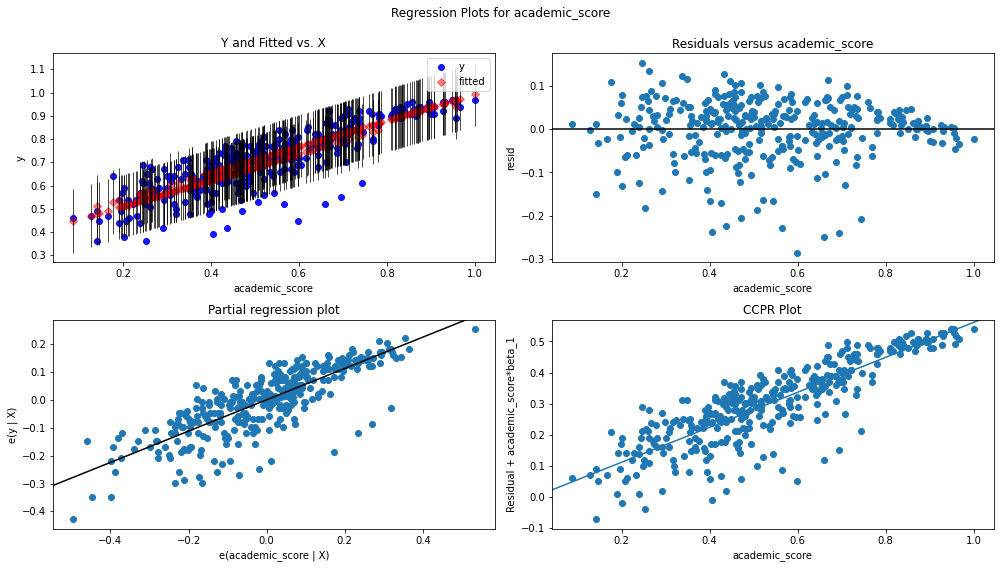

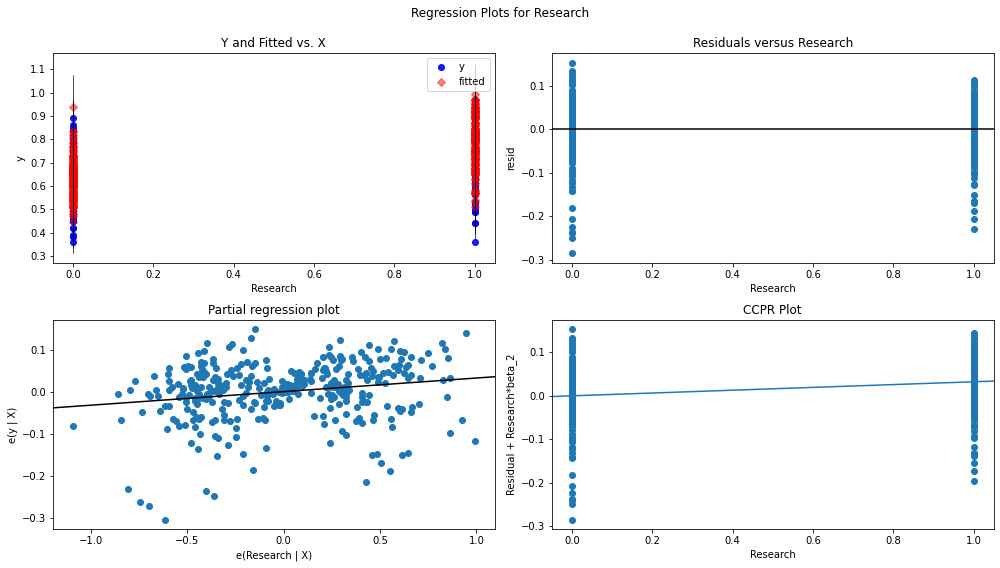

In [37]:
fig1 = plt.figure(figsize=(14, 8))
fig2 = plt.figure(figsize=(14, 8))
  
# creating regression plots
sm.graphics.plot_regress_exog(olsres,
                                    'academic_score',
                                    fig=fig1)

# creating regression plots
sm.graphics.plot_regress_exog(olsres,
                                    'Research',
                                    fig=fig2)

plt.show()

### Assumptions of Linear Regression.

In this section, we discuss various necessary assumptions for linear regression.

3. **Linearity of variables (no pattern in the residual plot):** We check this assumption below.

4. **Test for Homoscedasticity:** We check this assumption below.

5. **Normality of residuals:** The residual distribution should look guassian (almost bell-shaped curve).The plots in QQ plot should lie almost along the line. We check this assumption below.

#### 1. Multicollinearity:  

Linear regression assumes that there is little or no multicollinearity among the independent features.  Multicollinearity occurs when the independent variables are highly correlated with each other. In the previous sections, we used correlation matrix/heatmap to identify high correlation among independent features. We then calculated VIF to identify features with high collinearity. We combined GRE, TOEFL, and CGPA into a single academic score variable as these are highly correlated and yet important features (based on intuition). We then evaluated several models - starting with single feature 'academic_score', and the adding more features and observing both VIF and Rsquare measures. At the end, we chose the following model.

**chance_of_admit ~ academic_score + Research**

where academic_score is an engineered feature combining GRE score, TOEFL score, and CGPA. This model has VIF scores < 5 and adjusted Rsquare score of ~75.8% on training data and ~81.5% on the test data. 

**Thus, our model meets multicollinearity assumption.**

#### 2. Mean of residuals

The mean of residuals should be nearly zero. As shown in the plot below, the mean value of residuals is very close to zero. So this assumption is satisfied.

<AxesSubplot:xlabel='Chance of Admit'>

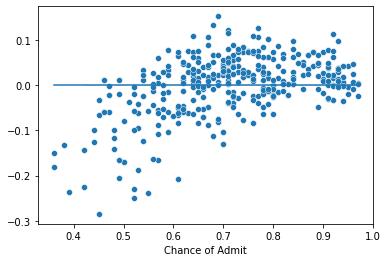

In [38]:
resid_mean = np.mean(olsres.resid)
sns.scatterplot(x=y_train, y=olsres.resid)
sns.lineplot(x=y_train, y=[resid_mean]*len(y_train))

#### 3. Linearity of variables

There should be linear relationship between the independent and dependent variables. We can confirm this from the scatter plots shown below. 

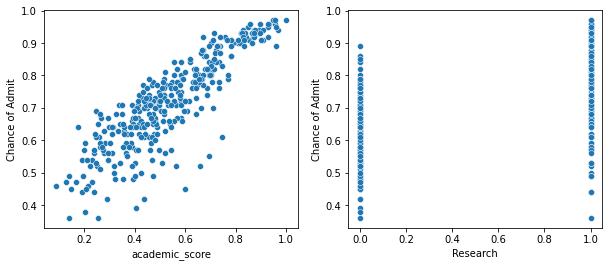

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(x=X_train['academic_score'], y=y_train, ax=ax[0])
sns.scatterplot(x=X_train['Research'], y=y_train, ax=ax[1])

plt.show()

#### 4. Test for Homoscedasticity

The error terms (residuals) should be constant around zero. We observe that for the lower values of chance of admit (<0.6), the errors seem to be biased towards negative values. However, when chance of admit is > 0.6, the errors seem constant around zero. Thus the assumption of Homoscedasticity is met only partially.

<AxesSubplot:xlabel='Chance of Admit'>

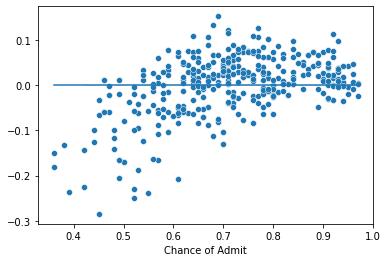

In [40]:
sns.scatterplot(x=y_train, y=olsres.resid)
sns.lineplot(x=y_train, y=[0]*len(y_train))

#### 5. Normality of residuals

The residual distribution should look guassian (almost bell-shaped curve).The plots in QQ plot should lie almost along the line. As shown below, the residuals seem to somewhat fall along a straight line and thus partially meet the normality assumption.

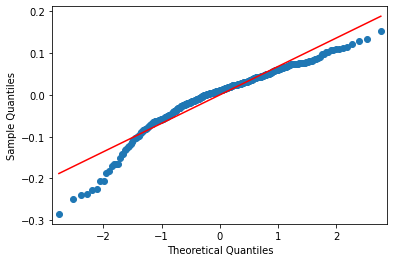

In [41]:
sm.qqplot(olsres.resid,line='s')
plt.show()

### Recommendations

#### model improvements

1. Since all the independent features are positively and linearly related (to varying degree) among themselves, while selecting features, we had the trade-off between improving model RSquare and keeping the multicollinearity low. The model with the best adj Rsquare score (\~81% on training, \~83% on test) had all the independent features as inputs, however, it also had high VIF scores for those features. The selected model, on the other hand, had lower adj RSquare (\~76% and \~81% on training and test), but lower VIF scores (<5). We used minmaxscaler in this casestudy before building the linear regression models. We can instead try using standardization to see if it can help lower VIF values even when we include all the features. If this works, we can get better adj R2 from our model. 

2. We can consider using cross validation techniques like k-fold to get better estimate of model performance on unseen data. 

3. Principal Component Analysis could be one potential option to take advantage of the the inherent multicollinearity among indepedent features to create new set of uncorrelated features which can then be used in linear regression.

#### business recommendations

1. Currently, the data available is for 500 students. Collecting data from more students will help build better model and make more precise predictions. 

2. In addition to the common profile elements captured today, business can explore possibility of identifying target university specific focus areas/requirements and relevant user profile elements. For example, STEM universities may put more focus on GRE Maths score/Mathematics score in undergrad, on the other hand, literature/Social Science courses may prefer candidates having higher GRE English score. Capturing such details may allow building more sophisticated models with better predictions. 